In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('rainfall_with_predictions.csv')
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,predicted
0,1901,34.7,38.6,17.8,38.9,50.6,113.2,241.4,271.6,124.7,52.4,38.7,8.2,1030.8,73.2,107.3,751.0,99.3,1029.480
1,1902,7.4,4.2,19.0,44.1,48.8,111.7,284.9,201.0,200.2,62.5,29.4,25.2,1038.4,11.6,111.9,797.8,117.2,1032.745
2,1903,16.7,8.0,31.1,17.1,59.5,120.3,293.2,274.0,198.1,119.5,40.3,18.0,1195.9,24.7,107.7,885.6,177.8,1197.508
3,1904,14.9,9.7,31.4,33.7,73.8,165.5,260.3,207.7,130.8,69.8,11.2,16.4,1025.1,24.5,138.8,764.3,97.4,1030.097
4,1905,24.7,20.3,41.8,33.8,55.8,93.7,253.0,201.7,178.1,54.9,9.6,10.1,977.5,45.0,131.4,726.4,74.7,973.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2009,12.0,12.0,14.2,25.1,56.0,85.7,280.7,192.5,139.4,71.4,53.7,11.1,953.7,24.0,95.3,698.3,136.1,958.043
109,2010,7.5,17.0,14.0,39.0,73.8,138.1,300.7,274.7,197.7,69.0,61.4,22.7,1215.5,24.5,126.8,911.1,153.2,1220.490
110,2011,6.8,25.8,22.4,41.1,53.1,183.5,246.0,284.9,186.9,38.1,20.1,7.6,1116.3,32.6,116.6,901.3,65.8,1117.232
111,2012,26.5,12.7,11.3,47.5,31.7,117.8,250.2,262.4,193.5,58.7,30.7,11.7,1054.7,39.2,90.5,823.9,101.1,1058.975


In [7]:
print(df.head())

   YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  34.7  38.6  17.8  38.9  50.6  113.2  241.4  271.6  124.7   52.4   
1  1902   7.4   4.2  19.0  44.1  48.8  111.7  284.9  201.0  200.2   62.5   
2  1903  16.7   8.0  31.1  17.1  59.5  120.3  293.2  274.0  198.1  119.5   
3  1904  14.9   9.7  31.4  33.7  73.8  165.5  260.3  207.7  130.8   69.8   
4  1905  24.7  20.3  41.8  33.8  55.8   93.7  253.0  201.7  178.1   54.9   

    NOV   DEC     ANN  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  predicted  
0  38.7   8.2  1030.8     73.2    107.3    751.0     99.3   1029.480  
1  29.4  25.2  1038.4     11.6    111.9    797.8    117.2   1032.745  
2  40.3  18.0  1195.9     24.7    107.7    885.6    177.8   1197.508  
3  11.2  16.4  1025.1     24.5    138.8    764.3     97.4   1030.097  
4   9.6  10.1   977.5     45.0    131.4    726.4     74.7    973.722  


In [17]:
features = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
target = 'predicted'

In [19]:
X = df[features]
y = df[target]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [29]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 7.221907825970808
Mean Squared Error: 81.15285798758612
Root Mean Squared Error: 9.008488107756268


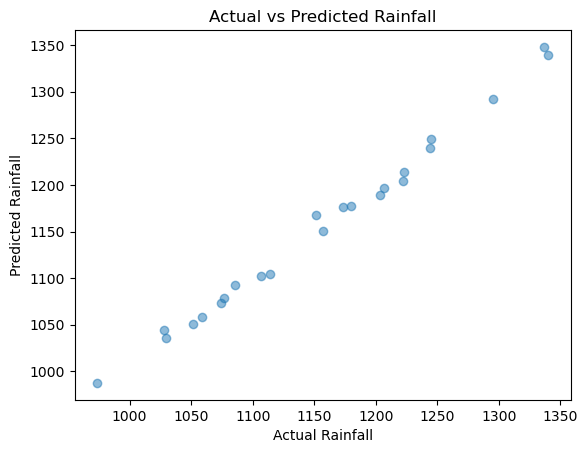

In [31]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()

In [33]:
def predict_rainfall(year, month_values):
    input_data = np.array([[year] + month_values])
    predicted_rainfall = model.predict(input_data)[0]
    print(f'Predicted Rainfall for {year}: {predicted_rainfall:.2f} mm')
    return predicted_rainfall

In [39]:
predict_rainfall(2027, [100, 120, 90, 85, 110, 95, 130, 140, 115, 100, 105, 90])

Predicted Rainfall for 2027: 1301.07 mm


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1301.070310172802